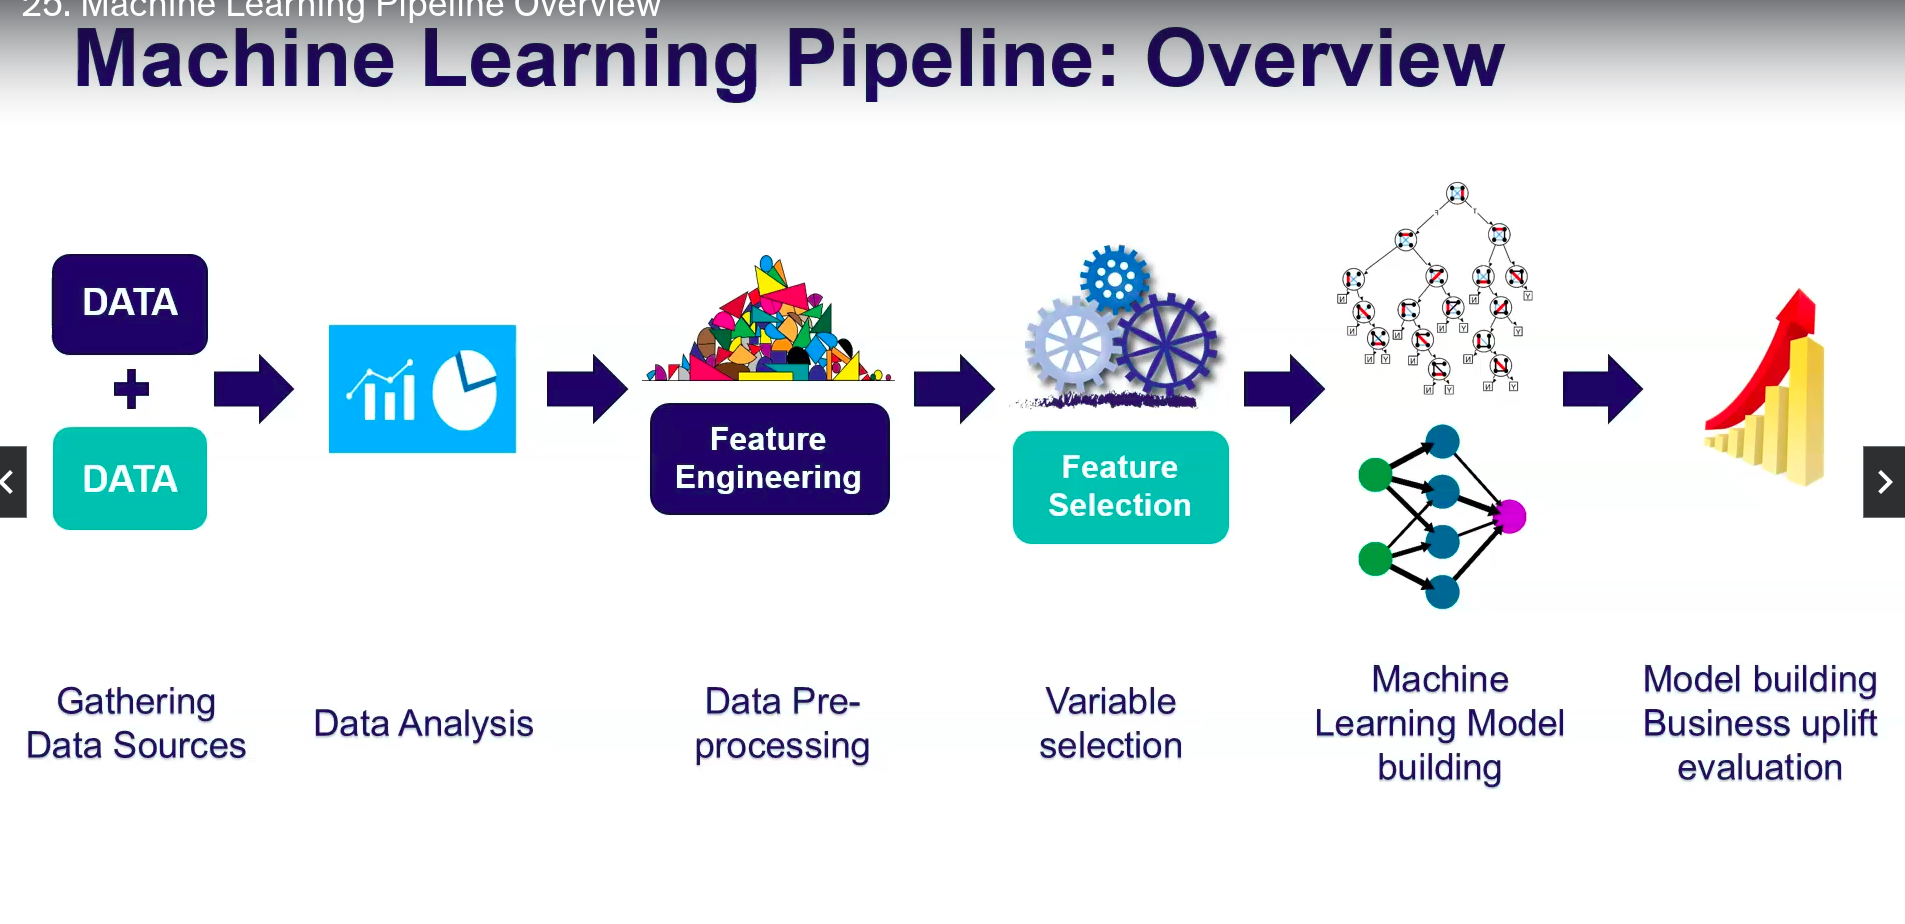

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [48]:
# load data
file_path = "/home/nooman/Desktop/House Price Prediction/"
train_data =  f"{file_path}train.csv"
test_data = f"{file_path}test.csv"

df = pd.read_csv(train_data)

print(df.shape)

df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

The house price dataset contains 1460 rows, that is, house, and 80 columns 

79 are predictive variables and 1 is the target variable

Analysis

we will analyse the following

1. The Target Variable
2. Variable Types
3. Missing data
4. Numerical Variables
   - Discrete
   - Countinous
   - Distribution
   - Transformation
5. Categorical Variables
    - Cardinalty
    - Rare Labels
    - Special mappings

### Target Variables

Let's begin by exploring the target solutions

/home/nooman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


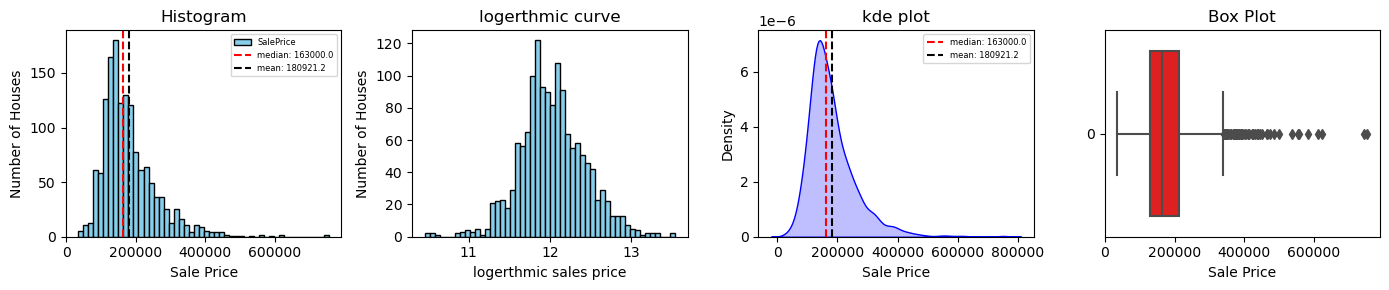

In [4]:
target = df["SalePrice"]
mean = round(target.mean(), 2)
median = round(target.median(), 2)

plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
target.plot(kind='hist', bins=50, color='skyblue', edgecolor="black")
plt.axvline(median, color='red', linestyle='--', linewidth=1.5, label= f'median: {median}')
plt.axvline(mean, color='black', linestyle='--', linewidth=1.5, label= f'mean: {mean}')
plt.ylabel("Number of Houses")
plt.xlabel("Sale Price")
plt.title("Histogram")
plt.legend(prop={"size": 6})
plt.tight_layout()

plt.subplot(1, 4, 2)
np.log(target).plot(kind='hist', bins=50, color='skyblue', edgecolor="black")
plt.ylabel("Number of Houses")
plt.xlabel("logerthmic sales price")
plt.title("logerthmic curve")
plt.tight_layout()
    
plt.subplot(1, 4, 3)
sns.kdeplot(target, fill=True, color="b", )
plt.axvline(median, color='red', linestyle='--', linewidth=1.5, label= f'median: {median}')
plt.axvline(mean, color='black', linestyle='--', linewidth=1.5, label= f'mean: {mean}')
plt.xlabel("Sale Price")
plt.legend(prop={"size": 6})
plt.title("kde plot")
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.boxplot(target, color="red", orient="h")
plt.xlabel("Sale Price")
plt.title("Box Plot")
plt.tight_layout()

In [5]:
maximum = df["SalePrice"].max()
print(f"Maximum sales price is {maximum}")

Maximum sales price is 755000


In [6]:
nulls = df["SalePrice"].isnull().sum()
print(f"Number of nulls in target is {nulls}")

Number of nulls in target is 0


### Seprate Categorical, Numerical, Temporal Data

In [7]:
cat_df = df.select_dtypes('O')

include = ["int64", "int32", "float32", "float64"]

num_df = df.select_dtypes(include=include).drop("SalePrice", axis=1)

print(f"Categorical Input Variable: {cat_df.shape[1]}")
print(f"Numerical Input Variable: {num_df.shape[1]}")

Categorical Input Variable: 43
Numerical Input Variable: 37


###### Univarient Analysis of Categorical Variable

In [8]:
def plot_nulls(df):
    x = df.isnull().sum().apply(lambda x: (x/len(df))*100).sort_values(ascending=False)
    x.plot(kind="bar")
    plt.xlabel("Categorical Variable")
    plt.ylabel("% of Nulls")
    plt.axhline(90, color="red", linewidth=1.5, linestyle="--", label = f"90%")
    plt.axhline(80, color="green", linewidth=1.5, linestyle="--", label = f"80%")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return x[x>0].index

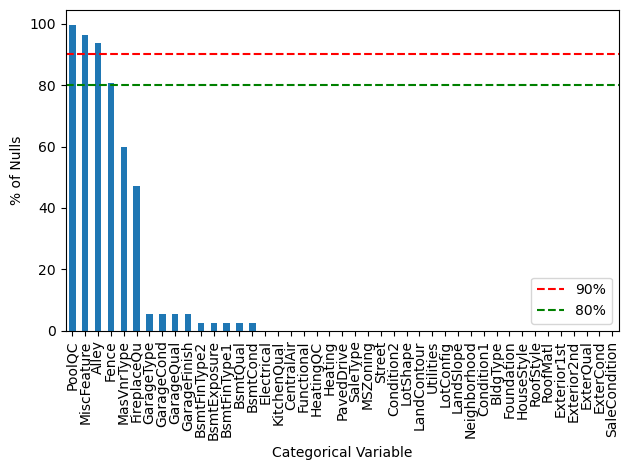

In [9]:
cat_null_columns = plot_nulls(cat_df)

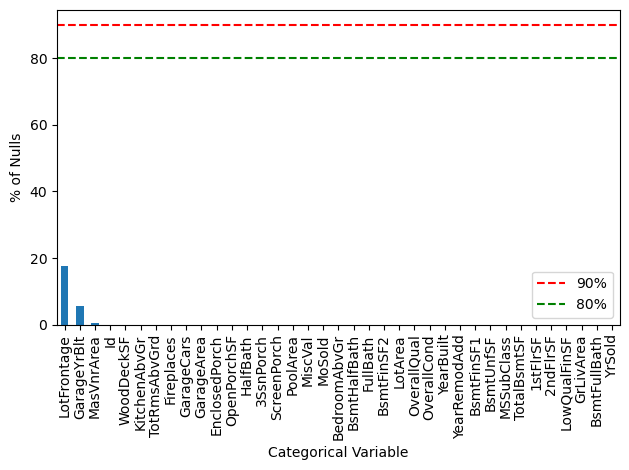

In [10]:
num_null_columns = plot_nulls(num_df)

In [11]:
# now we can determine which variables, from those with missing data
# are numerical and which are categorical
print("Number of categorical variables with na: ", len(cat_null_columns))
print("Number of numerical variables with na: ", len(num_null_columns))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


### Relation between missing data and sales price 

In [12]:
def analyse_na_value(df, var):
    # copy the dataframe, so that we do not override the original data
    df = df.copy()

    # let's make intermidiate variables that indicates 1 if the observation
    # was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observation with nan or without
    tmp = df.groupby([var])["SalePrice"].agg(["median", "std"])
    tmp.plot(kind="barh", y="median", legend=False, xerr="std", title="Sale Price", color="green")

    plt.show()    

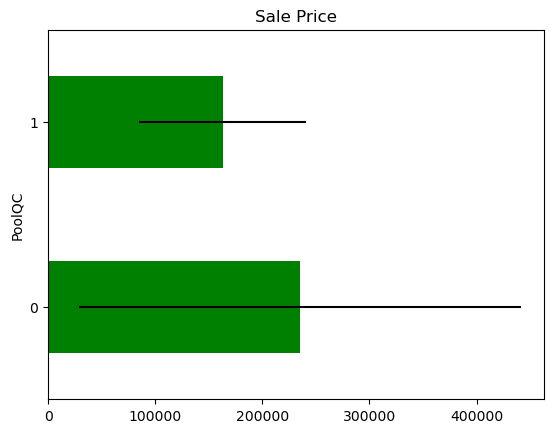

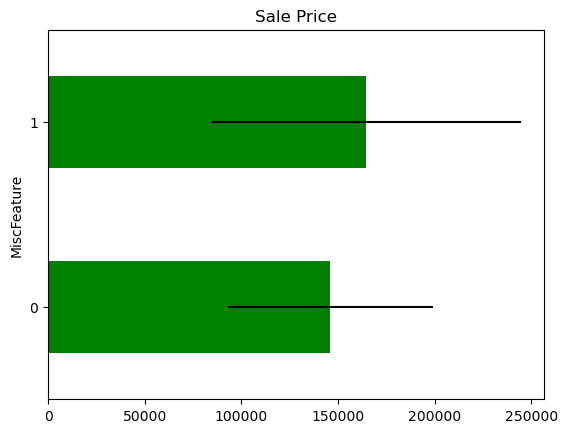

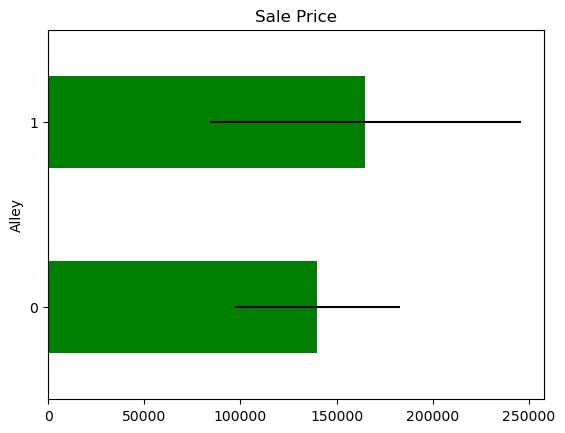

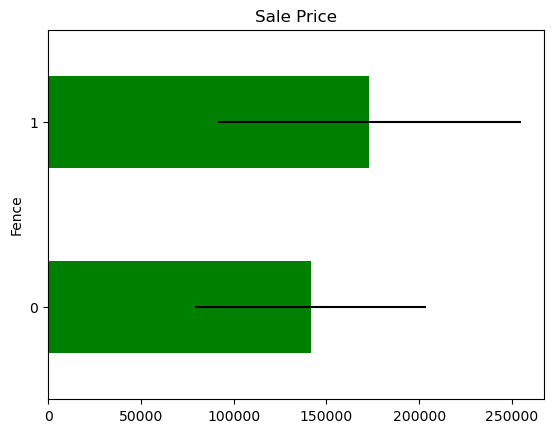

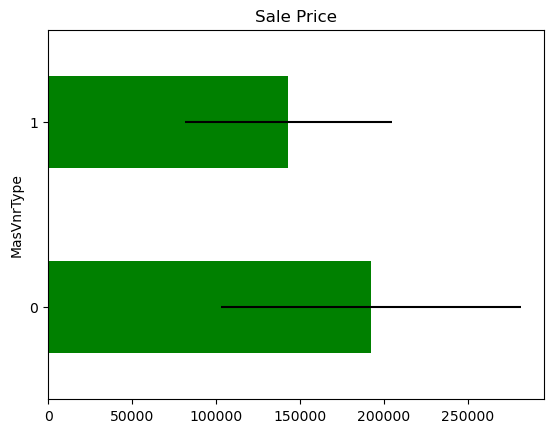

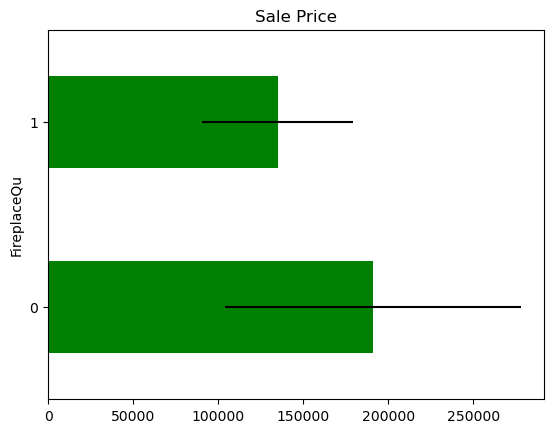

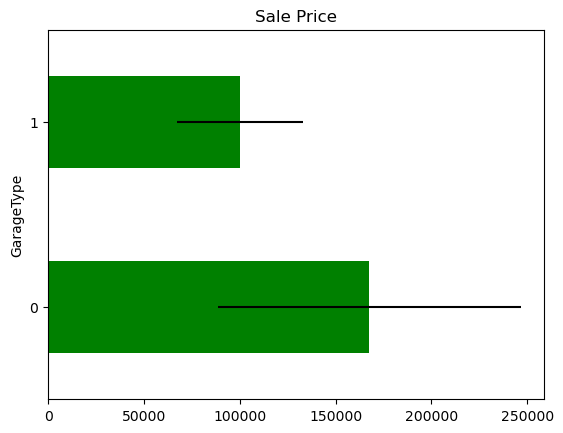

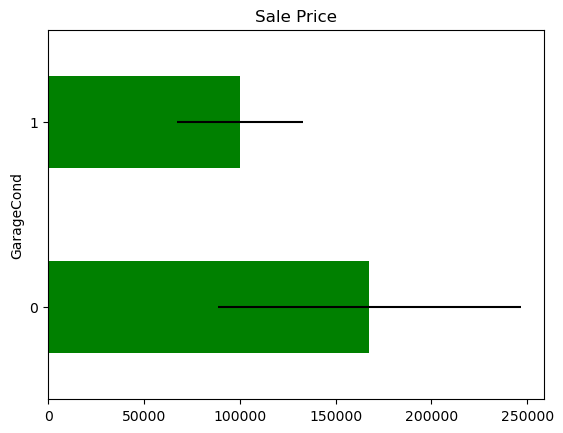

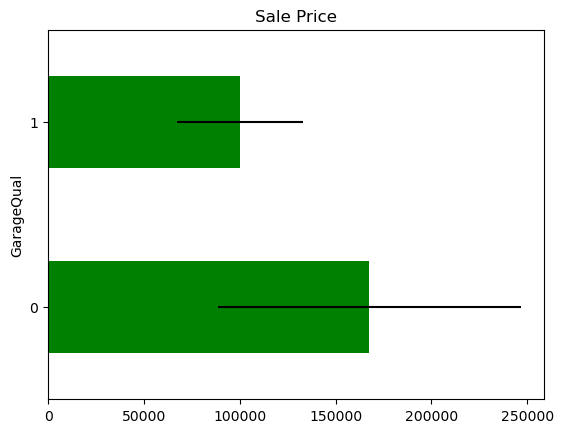

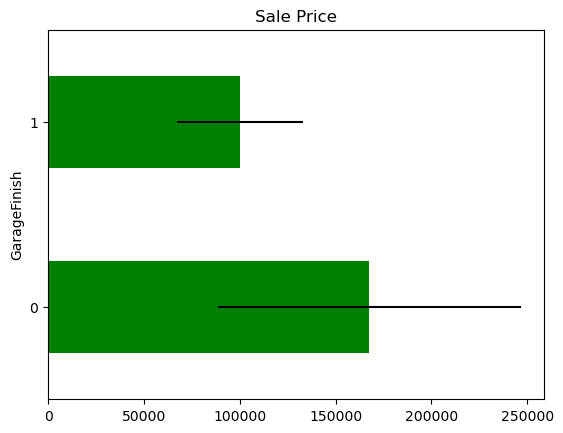

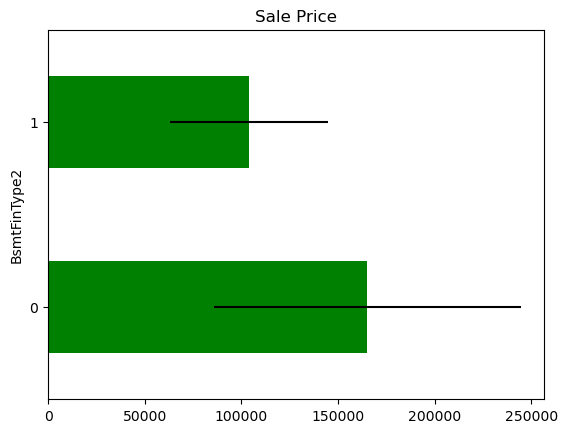

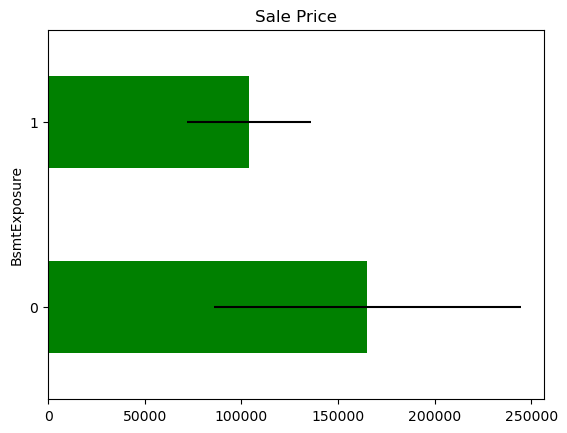

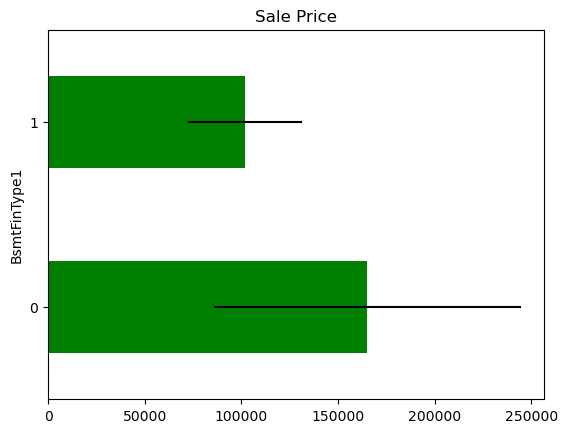

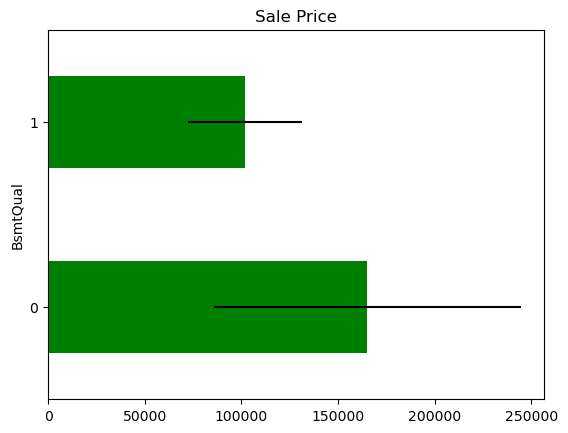

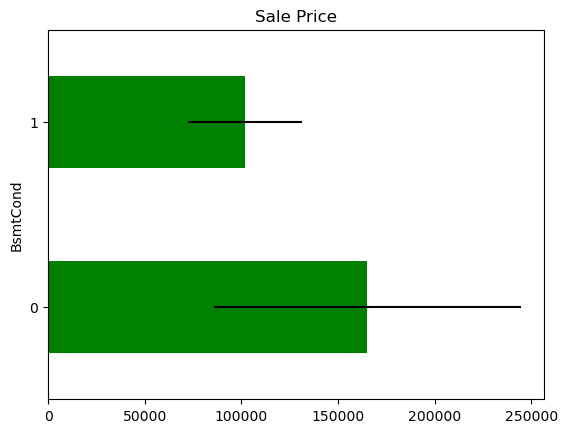

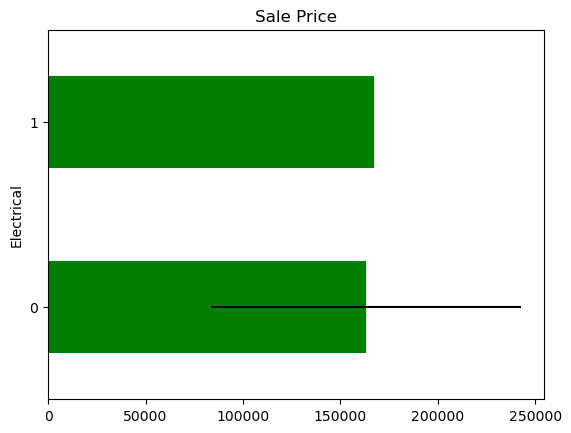

In [13]:
for col in cat_null_columns:
    analyse_na_value(df, col)

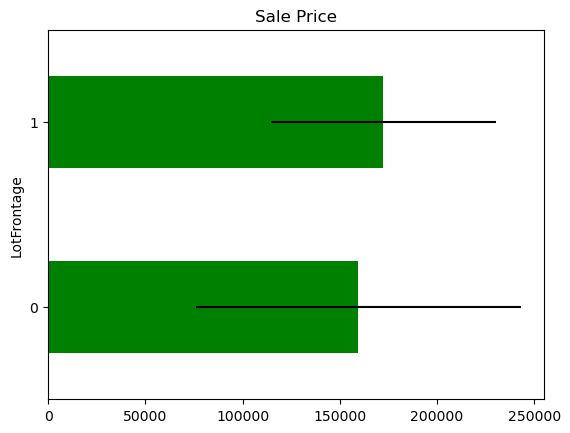

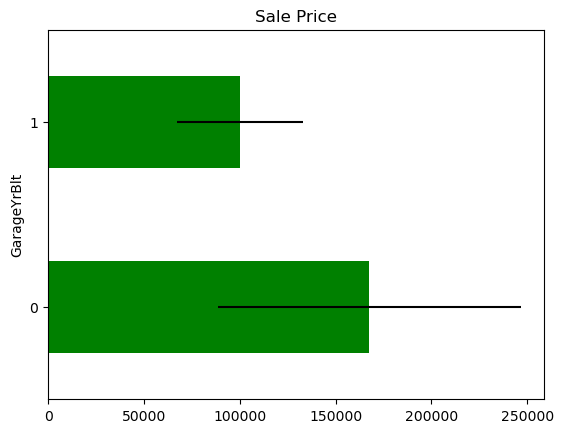

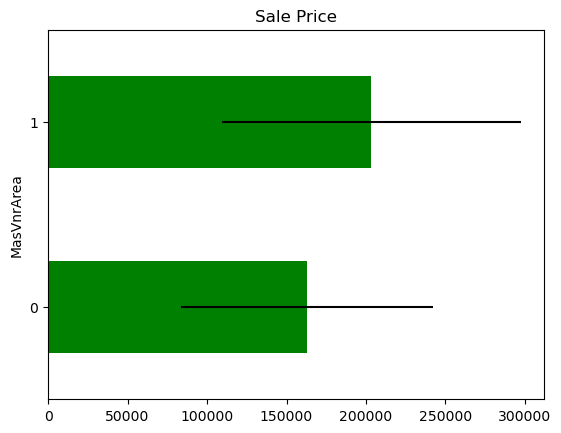

In [14]:
for col in num_null_columns:
    analyse_na_value(df, col)

#### Categorical Variables

Let's evauluate how many different categoreis are present in each of the variables

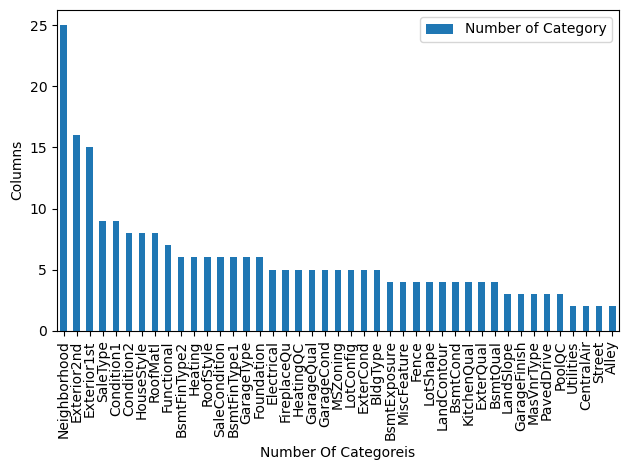

In [15]:
pd.DataFrame([[i, cat_df[i].nunique()] for i in cat_df.columns], 
             columns = ["columns", "Number of Category"]).sort_values(by="Number of Category", ascending=False).plot(
    kind="bar", x = "columns")
plt.xlabel("Number Of Categoreis")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

All the categorical variables show low cardinality, this means that they have only few different labels. That is good won't need to tabkle cardinality

#### Quality Variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [16]:
qual_mappings = {"po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "Missing": 0, "NA": 0}
finish_mappings = {"Missing": 0, "NA": 0, 'Unf': 1, 'Lwq': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}
Fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}


qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
   
            ]
garage_vars = ['GarageFinish']
finish_vars = ["BsmtFinType1", "BsmtFinType2"]
exposer_vars = ["BsmtExposure"]
Fence_vars = ["Fence"]

for var in garage_vars:
    df[var] = df[var].map(garage_mappings)

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

for var in exposer_vars:
    df[var] = df[var].map(exposure_mappings)

for var in Fence_vars:
    df[var] = df[var].map(Fence_mappings)

In [17]:
quality_vars = qual_vars + garage_vars + finish_vars + exposer_vars + Fence_vars

In [18]:
import warnings
warnings.filterwarnings('ignore')

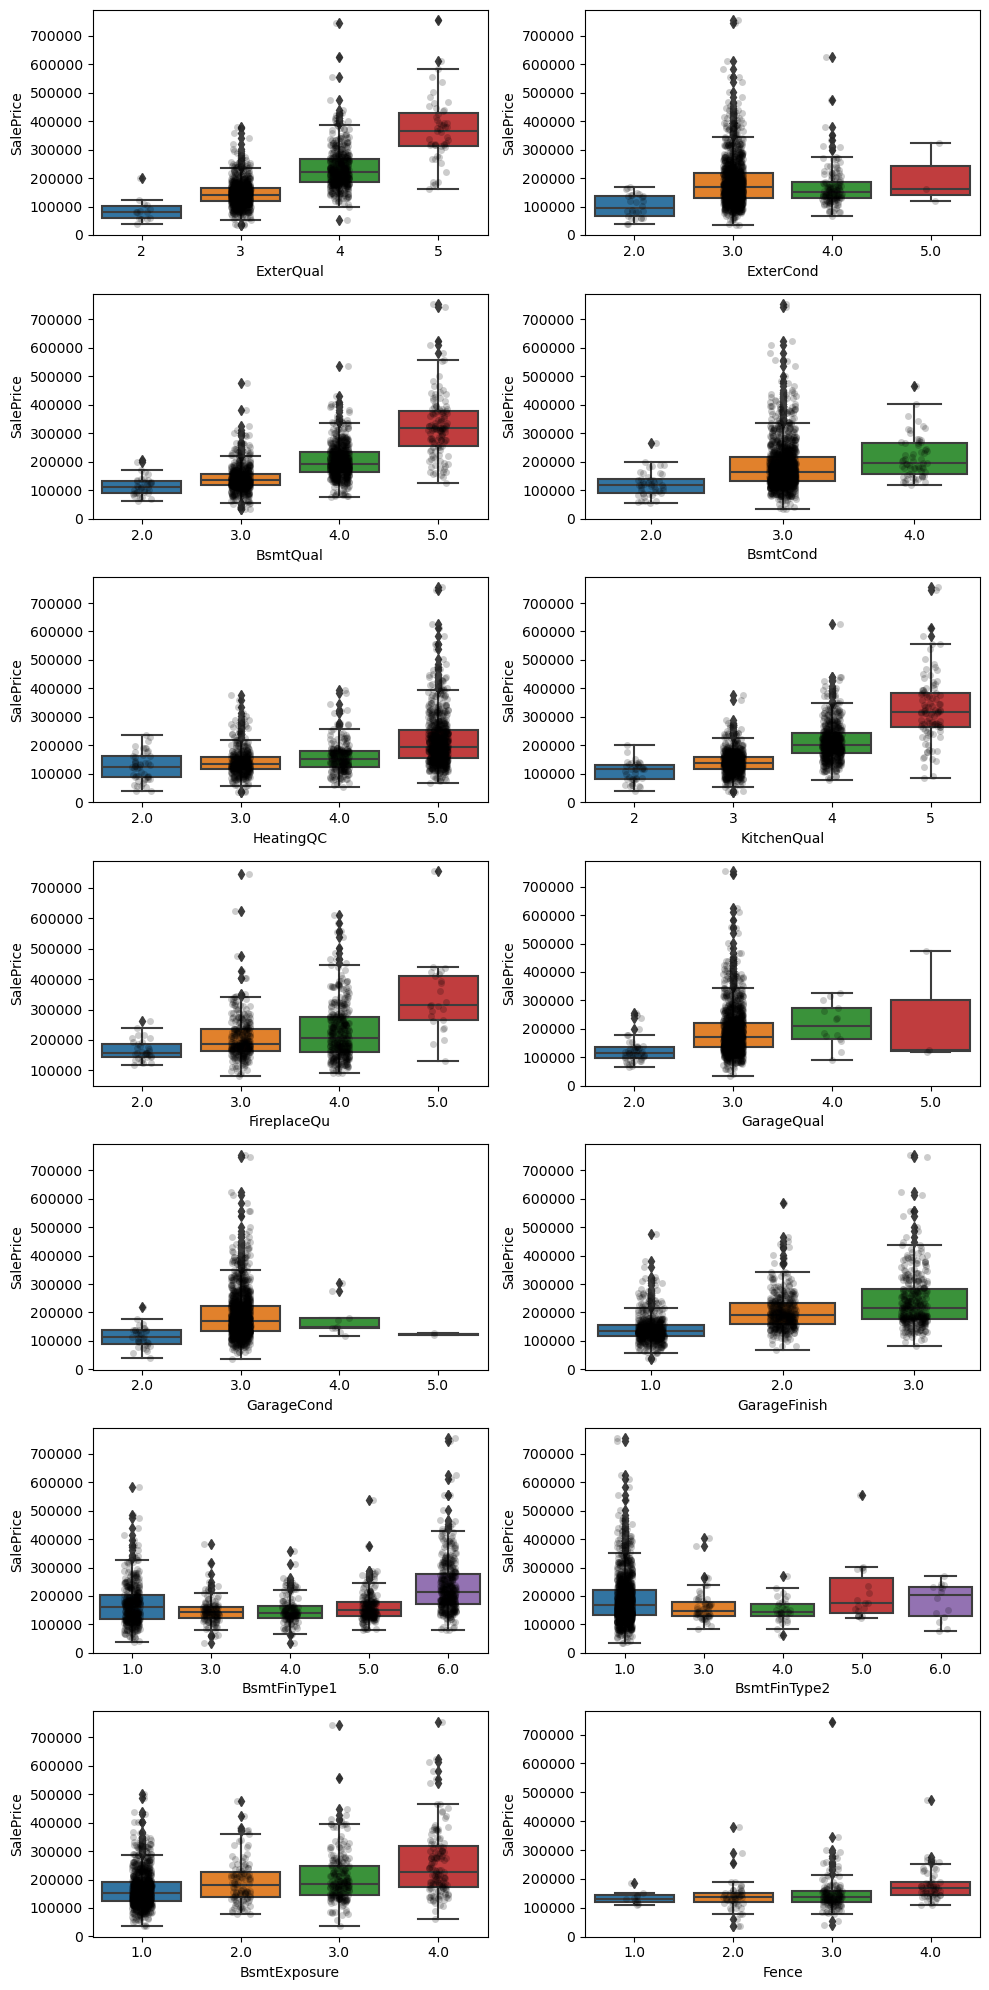

In [19]:
nrows=7
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 20))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(x=df[quality_vars].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j])
            sns.stripplot(x=df[quality_vars].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j], jitter=0.1, alpha=0.2, color="k")
            k += 1
        except:
            print("No more columns to plot")
    plt.tight_layout()
plt.show()

In [20]:
### capture the remaining categorical variables
others_cat = [col for col in cat_df.columns if col not in quality_vars]
len(others_cat)

29

### Rare labels

let's go ahead and investigate now if there are labels that are present only in small number of houses

In [21]:
def analyse_rare_labels(df, var, rare_per):
    df = df.copy()

    #determine the % of observation per category

    tmp = df.groupby(var)['SalePrice'].count()/len(df)

    return tmp[tmp <= rare_per]


for col in others_cat:
    print(analyse_rare_labels(df, col, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical have labels which have less than 1% value
this will be make our model to overfit 

that's why we need remove that

#### Relation between others categorical variable and price

No more columns to plot


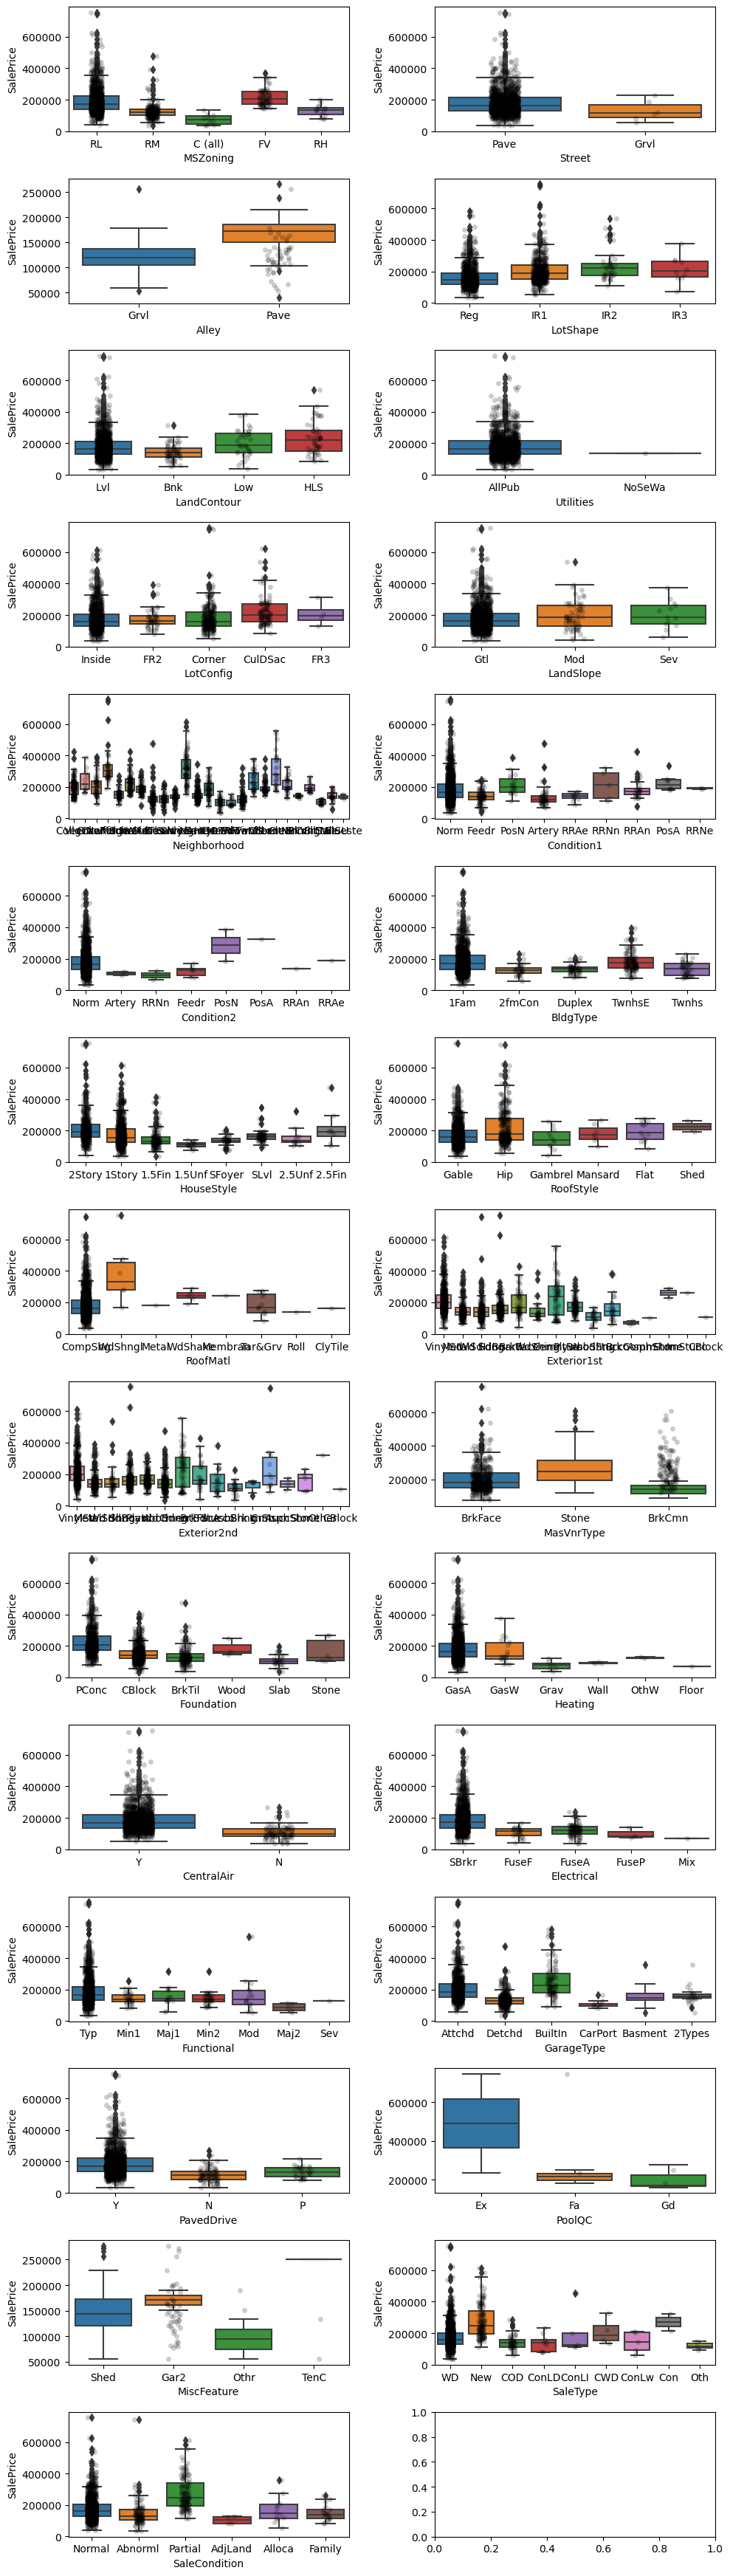

In [22]:
nrows=15
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 35))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(x=df[others_cat].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j])
            sns.stripplot(x=df[others_cat].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j], jitter=0.1, alpha=0.2, color="k")
            k += 1
        except:
            print("No more columns to plot")
    plt.tight_layout()
plt.show()

#### Temporal Variables

we have 4 years variables in the dataset:
 - YearBuilt: year in which the house was built
 - YearRemodAdd: year in which the house was remodeled
 - GarageYrBlt: year in which a garage was built
 - YrSold: year in which the house was sold

we generally don't use the raw date variables in teir raw format.Instead extract information from them
for example we can find difference between year built and year sold

In [23]:
temporal_df = df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]]

In [24]:
for col in temporal_df.columns:
    print(temporal_df[col].unique())

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930

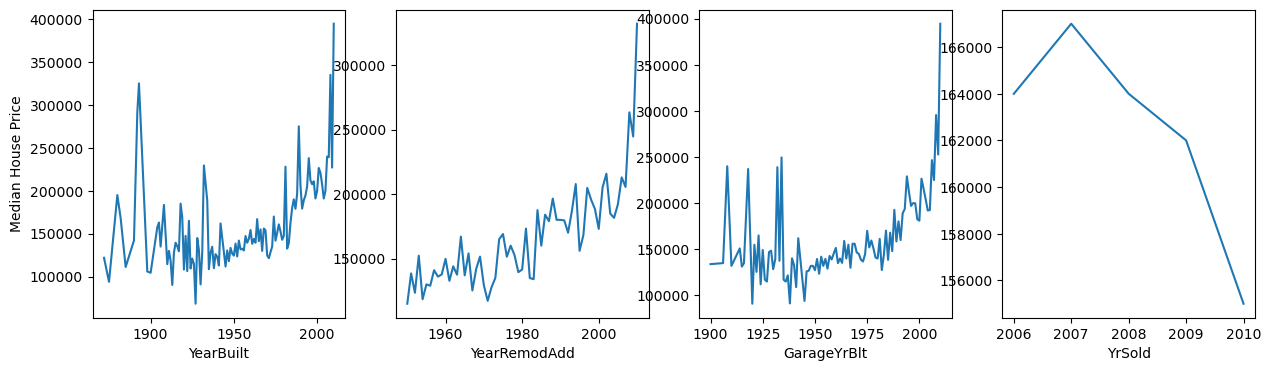

In [25]:
plt.figure(figsize=(15, 4))
plt.subplot(1,4,1)
plt.plot(df.groupby(["YearBuilt"]).agg({"SalePrice":"median"}))
plt.xlabel("YearBuilt")
plt.ylabel("Median House Price")

plt.subplot(1,4,2)
plt.plot(df.groupby(["YearRemodAdd"]).agg({"SalePrice":"median"}))
plt.xlabel("YearRemodAdd")

plt.subplot(1,4,3)
plt.plot(df.groupby(["GarageYrBlt"]).agg({"SalePrice":"median"}))
plt.xlabel("GarageYrBlt")

plt.subplot(1,4,4)
plt.plot(df.groupby(["YrSold"]).agg({"SalePrice":"median"}))
plt.xlabel("YrSold")
plt.show()

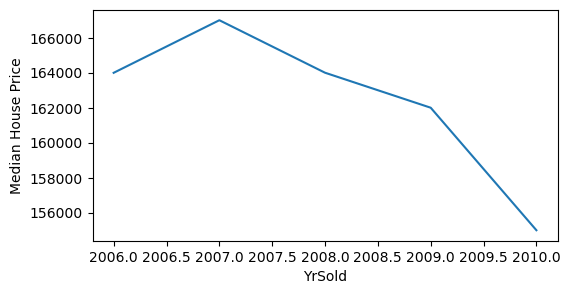

In [26]:
plt.figure(figsize=(6, 3))
plt.plot(df.groupby(["YrSold"]).agg({"SalePrice":"median"}))
plt.xlabel("YrSold")
plt.ylabel("Median House Price")
plt.show()

As the year increase there is sudden drop in price that is unusual, in actual the price of house going to increase in future

From first plot we can conclude that newly created house more costly than older one

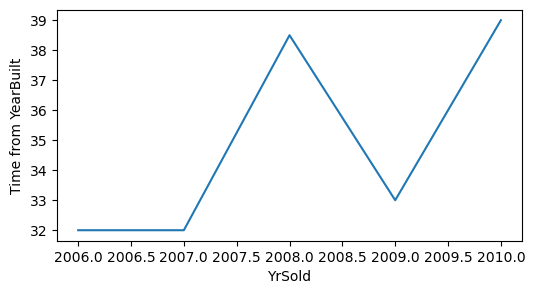

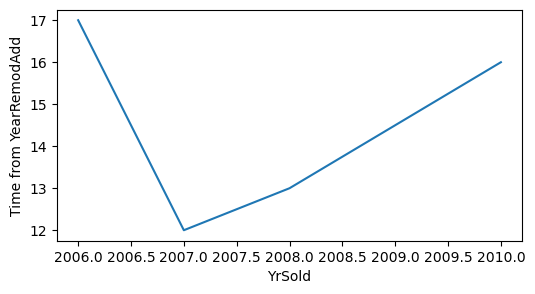

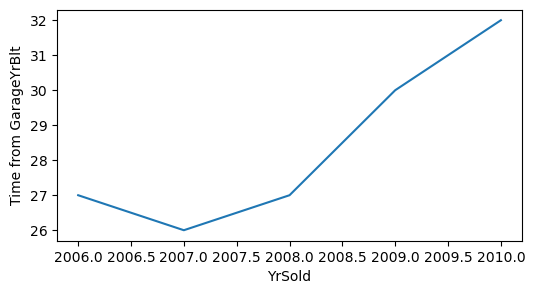

In [27]:
def analyse_year_vars(df, var):

    df = df.copy()
    df[var] = df["YrSold"] - df[var]
    plt.figure(figsize=(6, 3))
    df.groupby("YrSold")[var].median().plot()
    plt.ylabel("Time from "+ var)
    plt.show()

for col in temporal_df.columns:
    if col != "YrSold":
        analyse_year_vars(df, col)
    

As per above analysis we can say that towards 2010, the house sold had older gargaes, and had not been remolded recently , that can be cuase of cheaper house in recent years

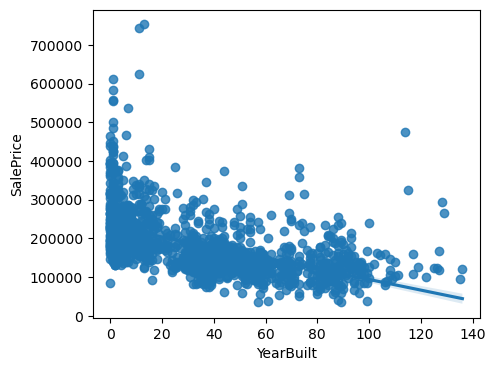

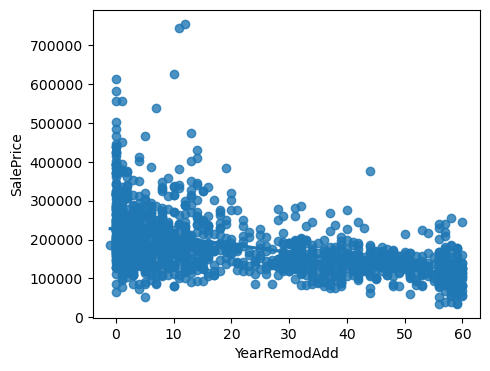

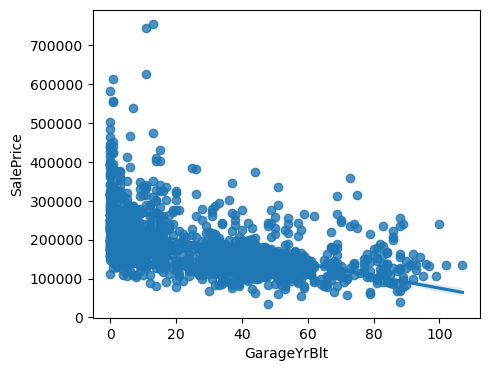

In [28]:
def analyse_years_col(df, var):
    df = df.copy()
    df[var] = df["YrSold"] - df[var]

    plt.figure(figsize=(5, 4))
    sns.regplot(x=df[var], y=df["SalePrice"])
    plt.show()

for col in temporal_df.columns:
    if col != "YrSold":
        analyse_years_col(df, col)

We see that there is a tendency to a decrease in price, with older house. In other house.In other words, the longer the time
between house build and house sold or hous remolder the price is cheaper.

#### Descrete Variables

Let's go ahead and find the variables which are descrete ie. finite value

In [29]:
# let's make list of descrete variable
# if the columns have less than 20 columns we consider as descrete variables
descrete_variables = [col for col in num_df.columns if num_df[col].nunique()<20 and col not in temporal_df.columns]
print(f"We have total {len(descrete_variables)} descrete variables")

We have total 14 descrete variables


In [30]:
df[descrete_variables].head()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9  
3         0       2  
4         0      12

The descrete variables tend to Qualification (Qual) or grad (COnd) or refer to the numbers of the room (BedroomAbvGr, TotRmsAbvGrd etc).

we expect higher price when number is higher

let's analyse relation with price

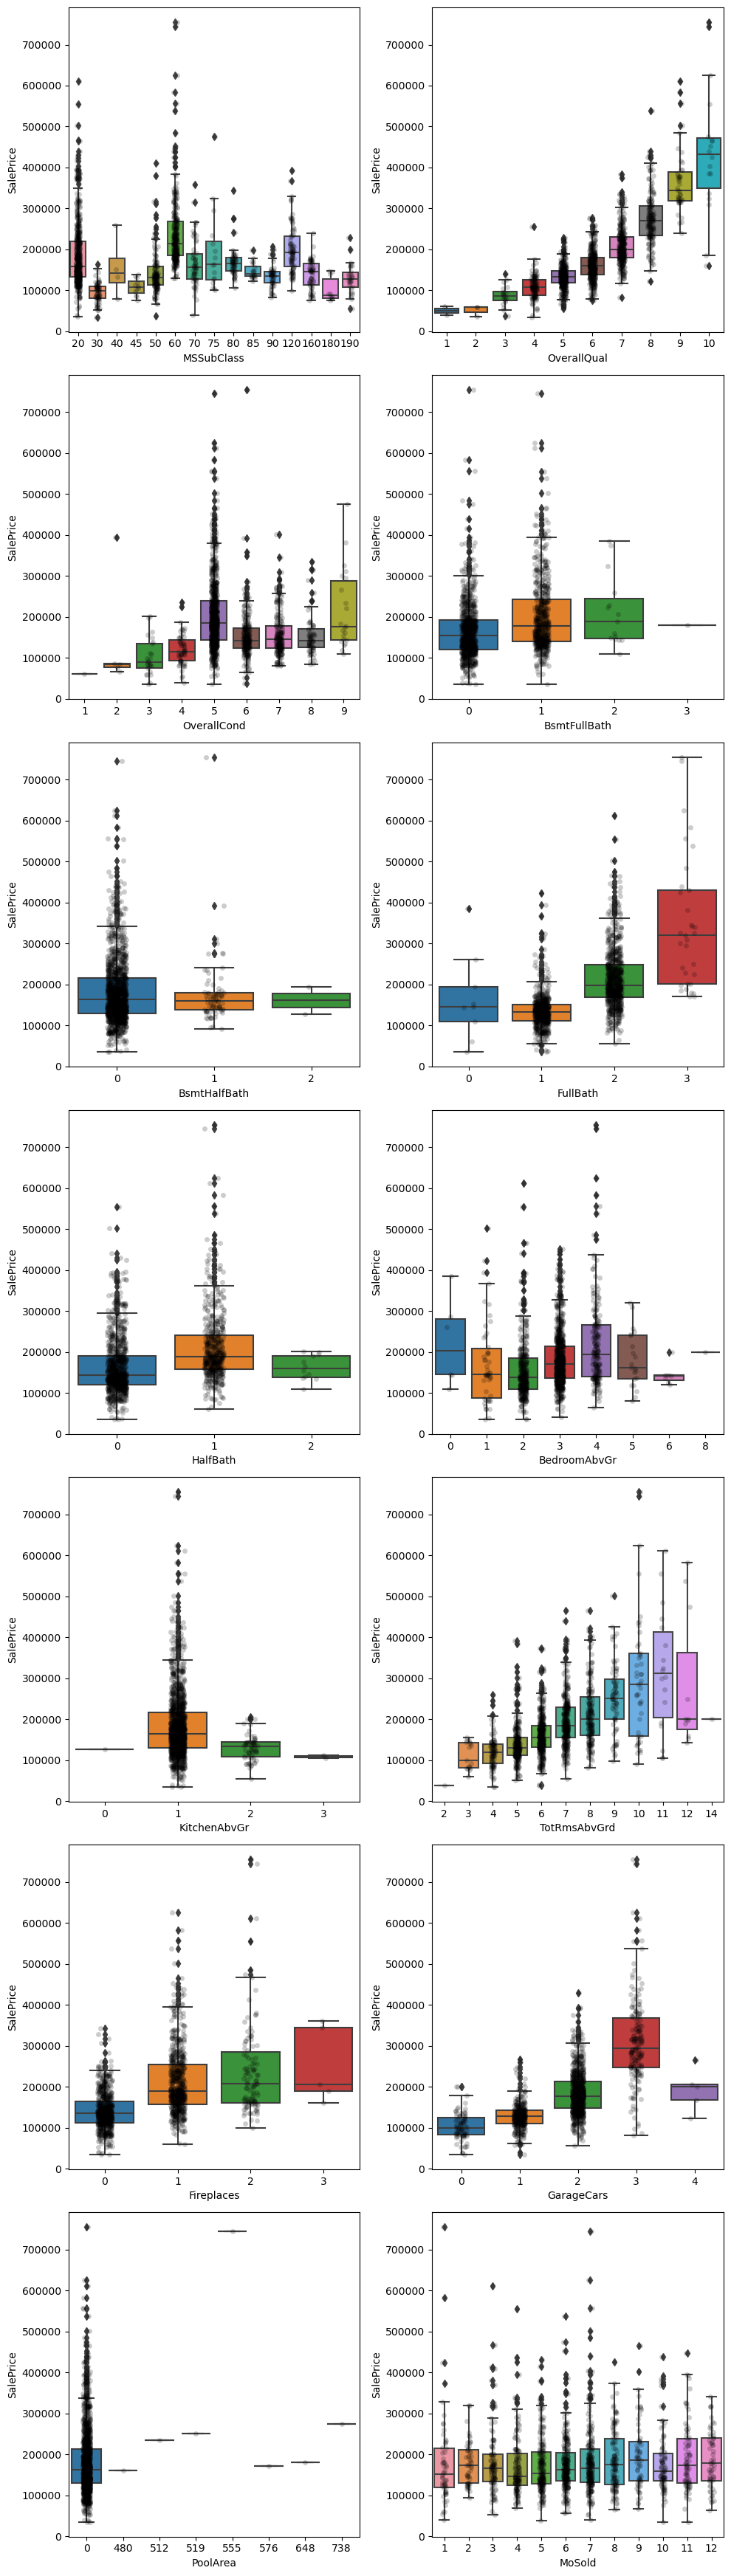

In [31]:
nrows=7
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 35))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(x=df[descrete_variables].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j])
            sns.stripplot(x=df[descrete_variables].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j], jitter=0.1, alpha=0.2, color="k")
            k += 1
        except:
            print("No more columns to plot")
    plt.tight_layout()
plt.show()

for some variables the price is increasing when the quality is increasing (Fire Places, TotRmsAbvGrd, Full bath etc.)

for some variables it is not (Pool Area, MoSold, KitcenAbvGr) these are not a good predictor for sale price.

#### Countinous Variables

Let's go to anlyse distribution of countinous variables , and relation between with our sale price,

we consider variable those are not descrete and countinous variables.

In [32]:
count_vars = [col for col in num_df.columns if col not in temporal_df.columns and col not in descrete_variables and col != "Id"]
print(f"Numbers of continous variables {len(count_vars)}")

Numbers of continous variables 18


In [33]:
df[count_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

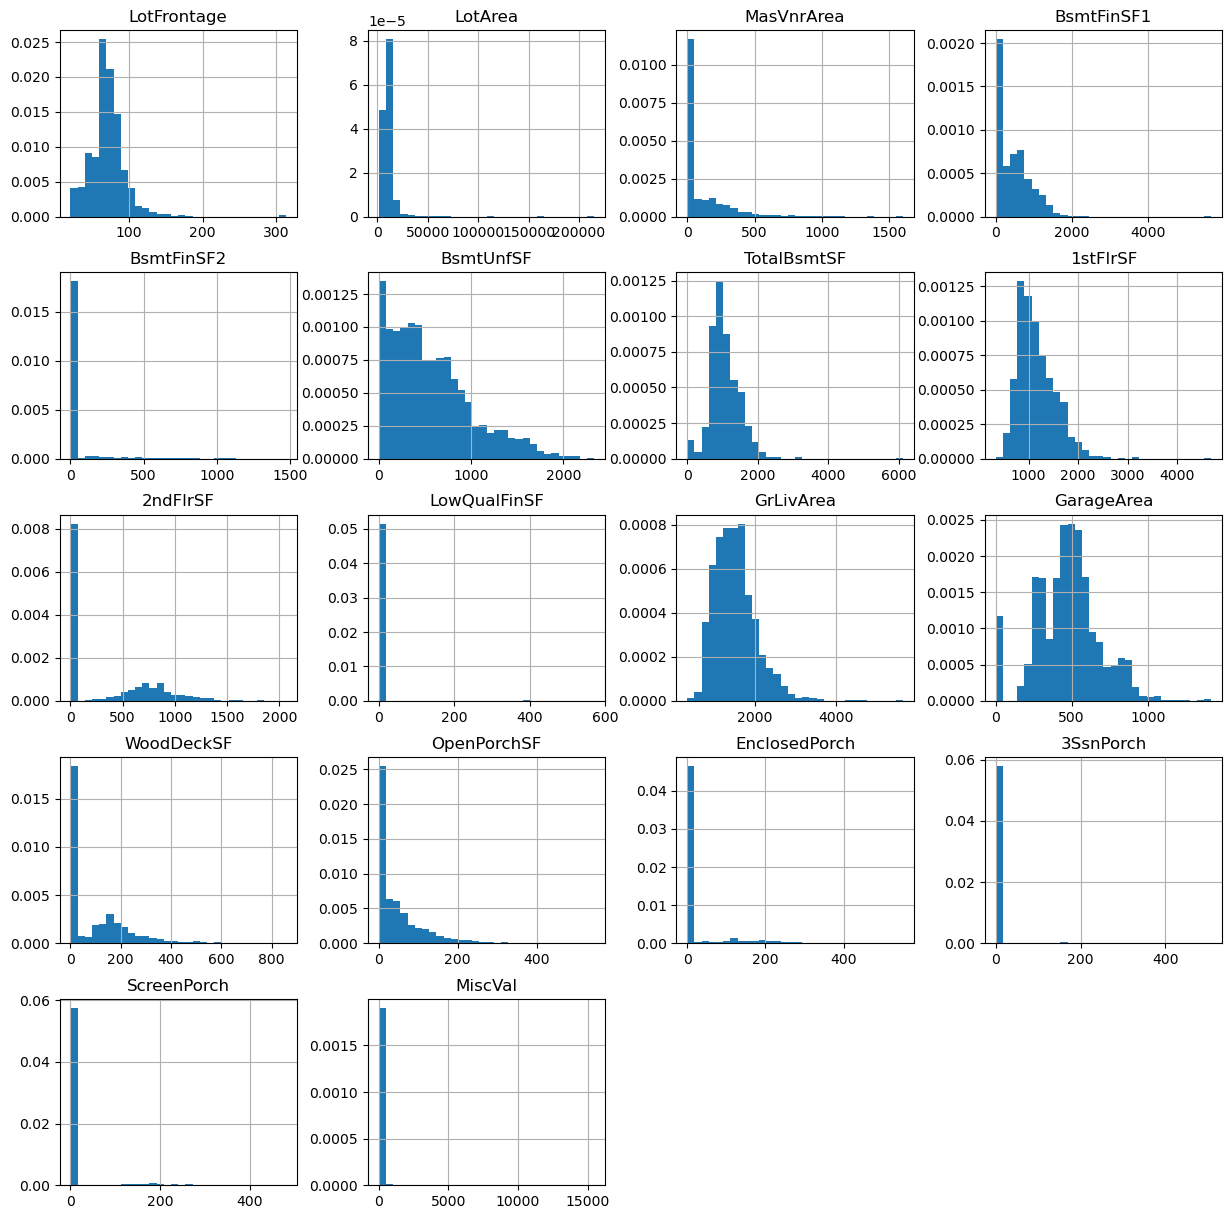

In [34]:
## let's plot histogram for all continous variables
df[count_vars].hist(bins = 30, figsize = (15, 15), density=True)
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

Let's go ahead and do that.

In [35]:
x = df[count_vars].skew().sort_values(ascending=False)
skewed_vars = x[x > 4].index
cont_vars = x[x < 4].index

In [36]:
skewed_vars, cont_vars

(Index(['MiscVal', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2',
        'ScreenPorch'],
       dtype='object'),
 Index(['EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
        'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
        'BsmtUnfSF', '2ndFlrSF', 'GarageArea'],
       dtype='object'))

#### Yeo-Johnson Transformation

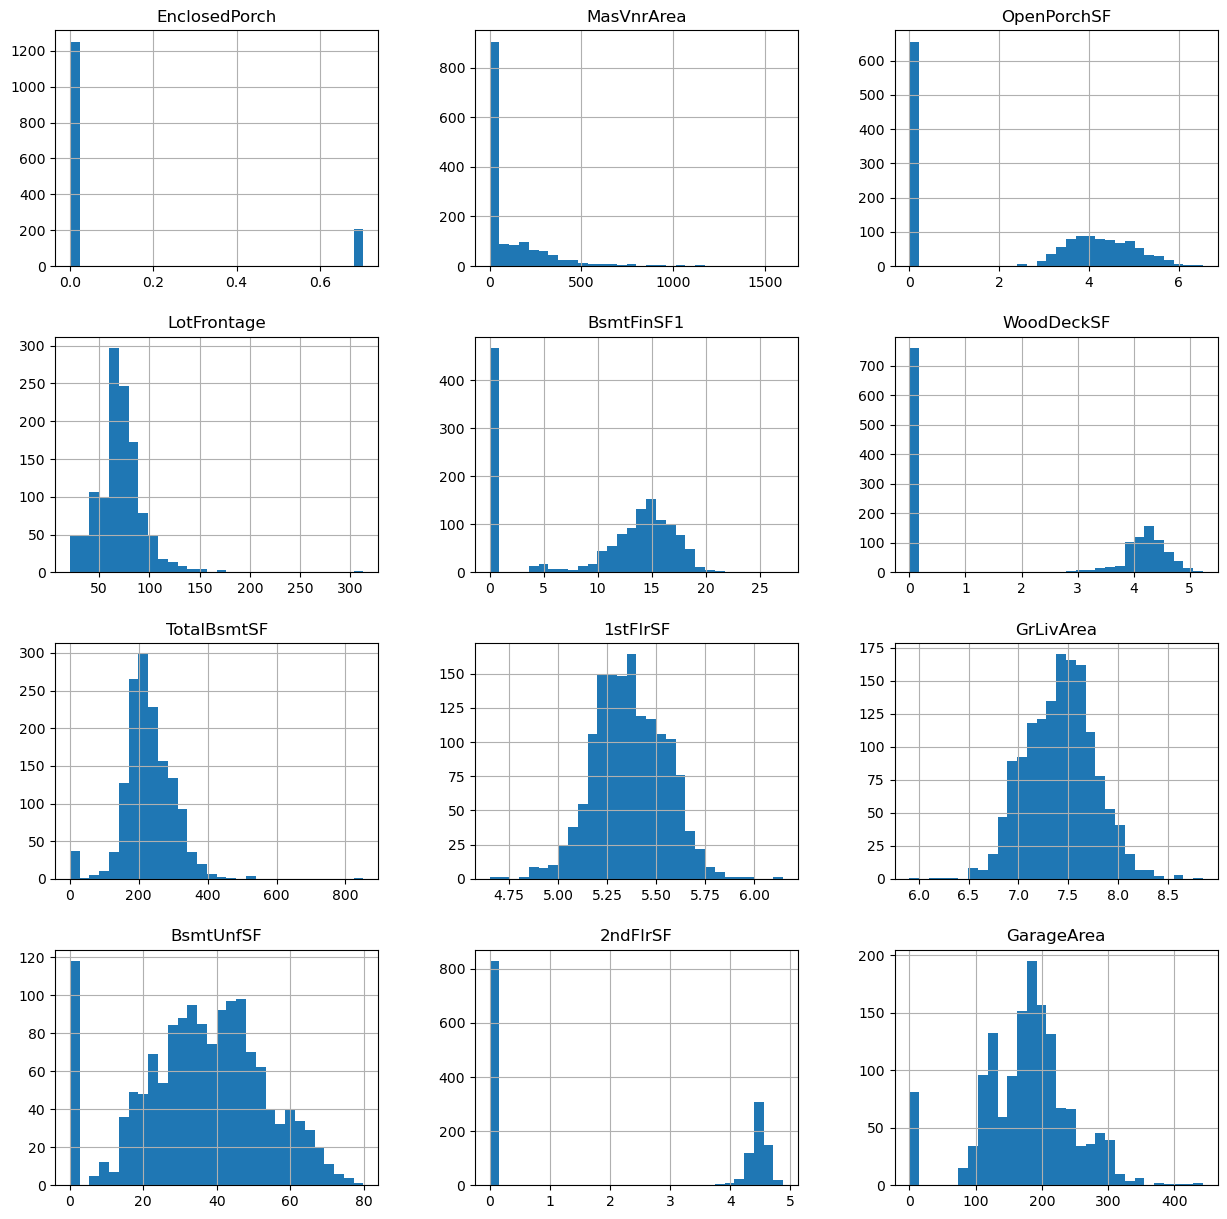

In [37]:
tmp = df.copy()
for col in cont_vars:
    try:
        tmp[col], param = stats.yeojohnson(df[col])
    except:
        pass

tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

For EnclosedPorch, MasVnrArea, OpenPorchSF, 2ndFirSF, 

Others look like littile Gaussian (value spread more evenly range)

Wether this helps improve the predictive power remain to be seen, for that purpose we need to train 2 models one is with feature transformation and without and determine model performance.

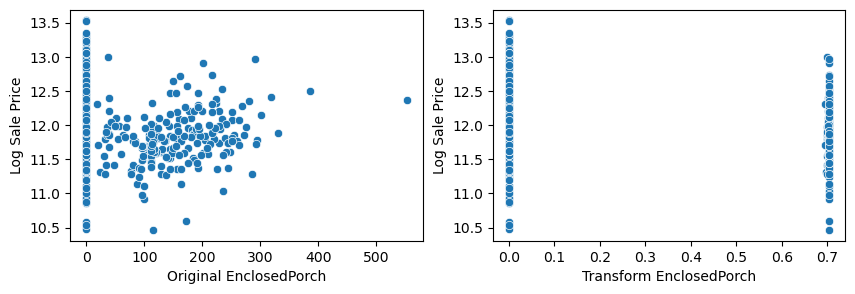

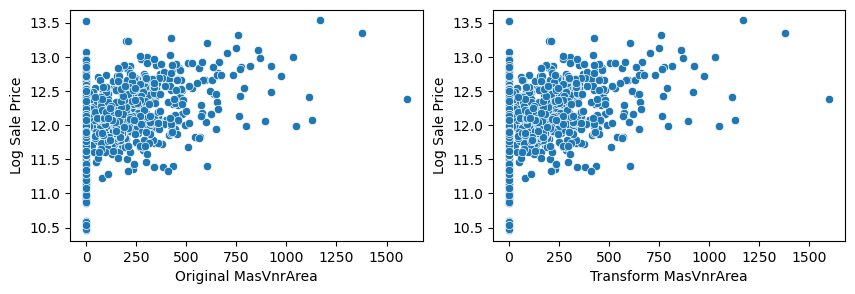

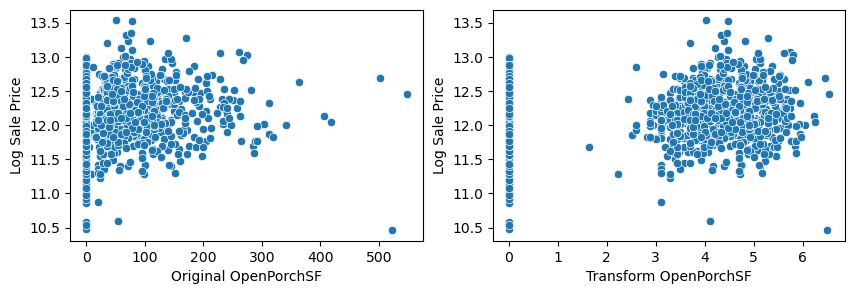

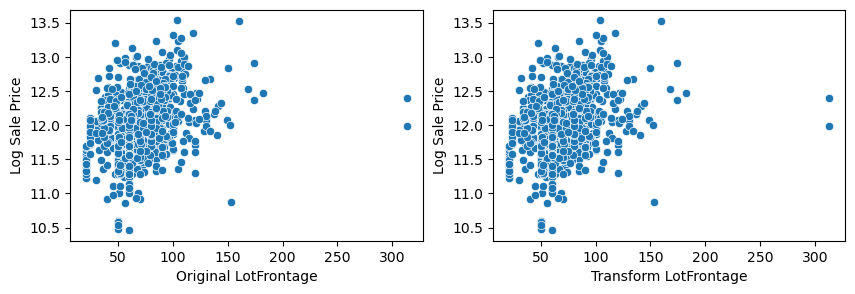

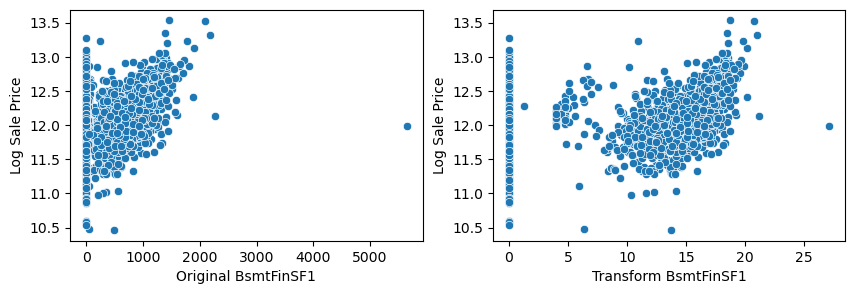

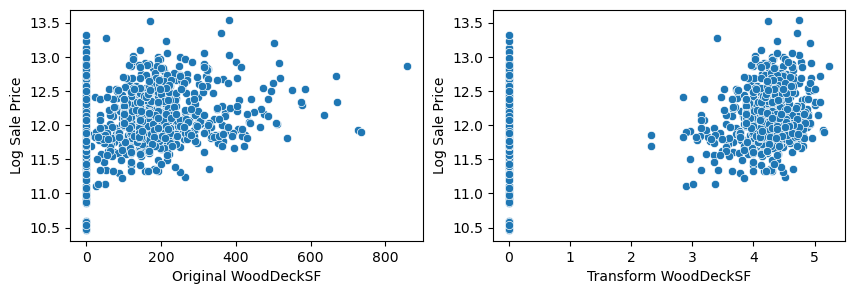

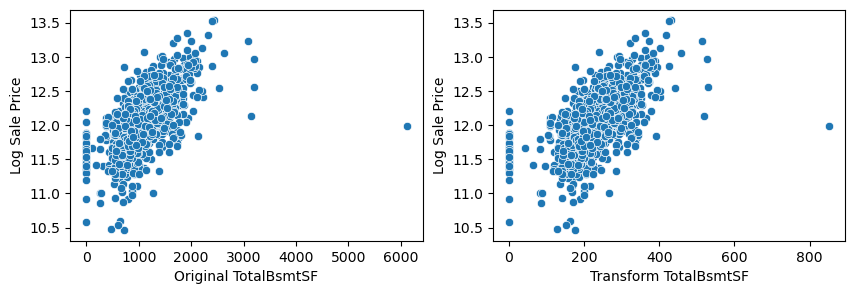

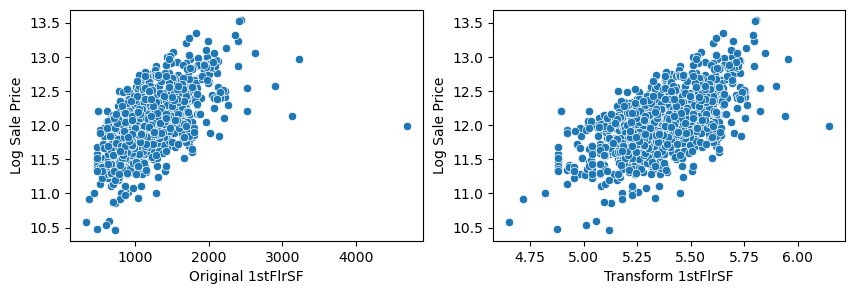

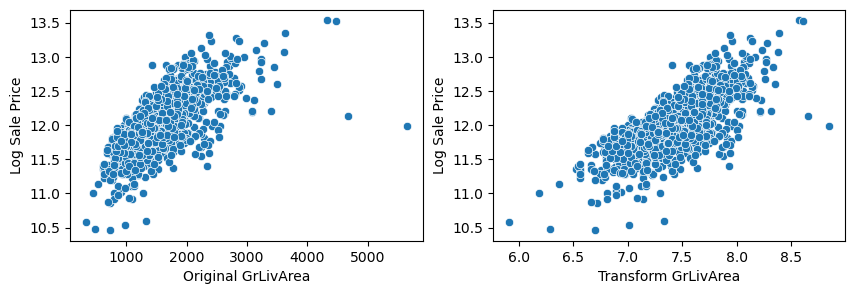

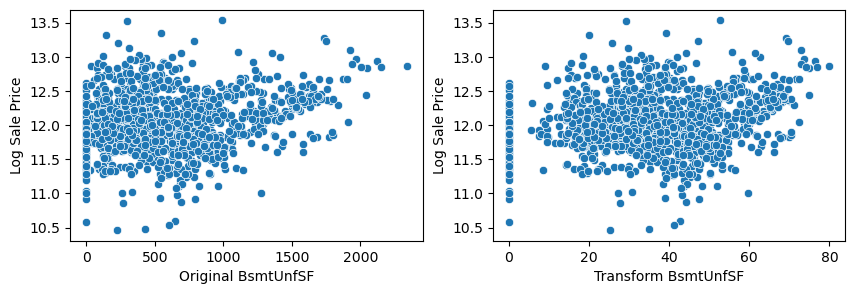

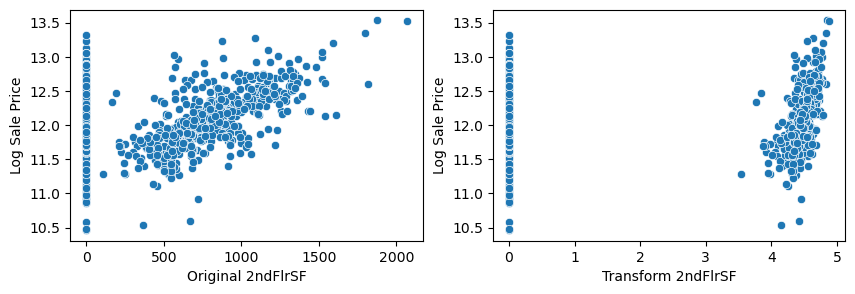

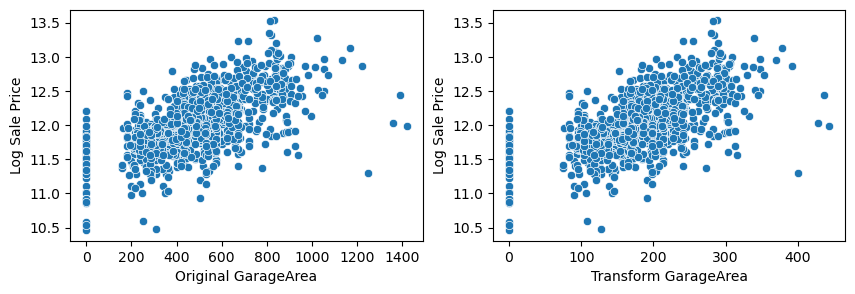

In [38]:
for var in cont_vars:

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)

    sns.scatterplot(x=df[var], y=np.log(df["SalePrice"]))
    plt.xlabel("Original " + var)
    plt.ylabel("Log Sale Price")

    plt.subplot(1, 2, 2)

    sns.scatterplot(x=tmp[var], y=np.log(df["SalePrice"]))
    plt.xlabel("Transform " + var)
    plt.ylabel("Log Sale Price")

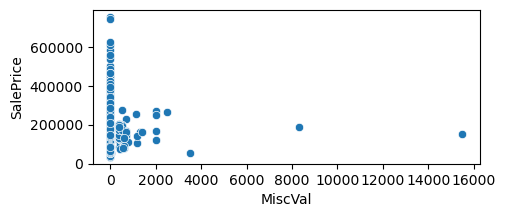

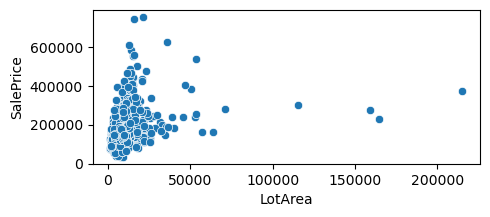

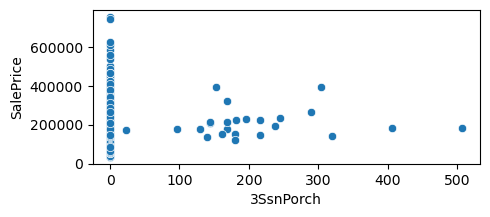

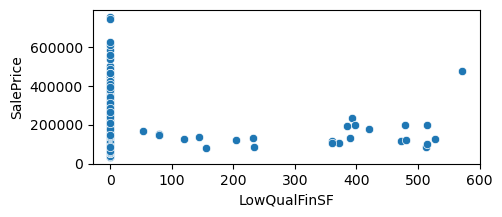

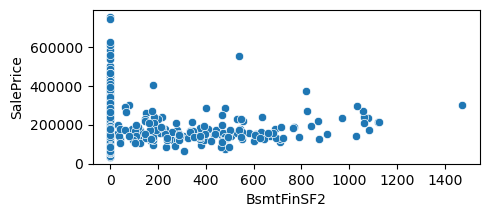

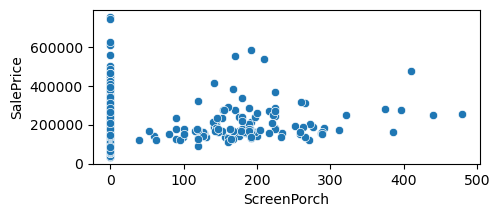

In [47]:
for col in skewed_vars:
    plt.figure(figsize=(5, 2))
    sns.scatterplot(x=df[col], y=df["SalePrice"])